# Trabalho 2

## Aluno : Gabriel Borin Macedo
## RA : 197201

# Descrição : Esse _script_ é o relatório do _trabalho 2_.

## Parte 0 : Criação da função de plot para o programa
Para esta célula, será criada uma função que faz o plot de images. Essa função foi criada para evitar a repetição de código desnecessário

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def plot_img(img: np.ndarray, show_title: bool = False, title_msg: str = "") -> None:
    """
    Função que faz o plot de uma imagem

    :param img: np.ndarray que representa a imagem que será plotada
    :param show_title: booleana que indica se será criado um título para o plot da imagem
    :param title_msg: string que representa o título da imagem
    :return: None
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap="gray", vmin=img.min(), vmax=img.max())
    if (show_title):
        plt.title(title_msg)
    plt.axis("off")
    plt.show()

## Parte 1 : Aplicação do método Global
Inicialmente, será definido a função do método global sendo

In [2]:
def global_method(img: np.ndarray, t: int) -> np.ndarray:
    """

    :param img:
    :param t:
    :return:
    """
    label_img = img.copy()
    label_img[label_img <= t] = 1
    label_img[label_img > t] = 0
    #print("min = {} || max = {}".format(label_img.min(), label_img.max()))
    return label_img

Agora, vamos carregar uma imagem de exemplo

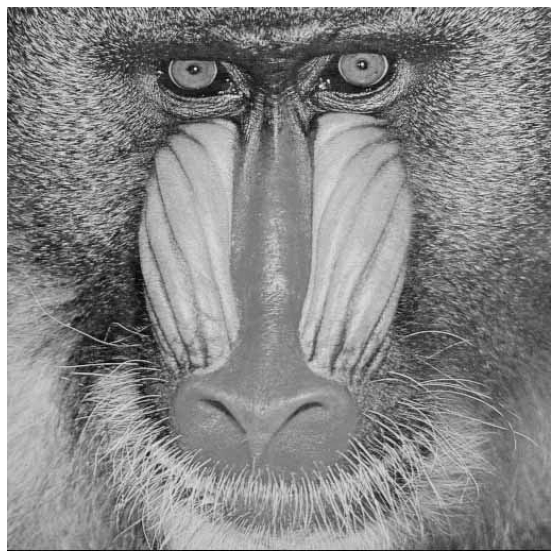

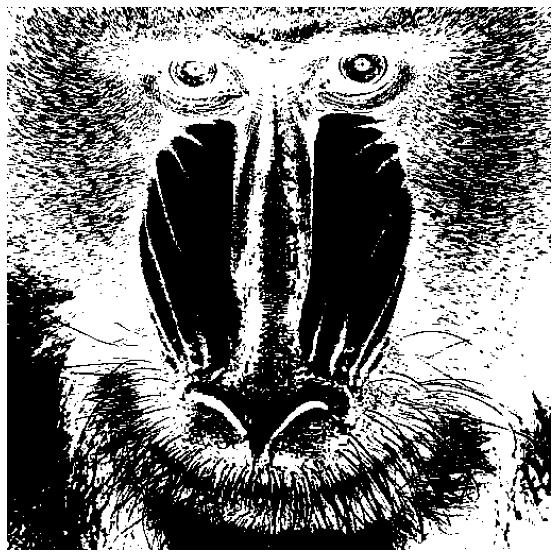

0
1


In [3]:
img = cv2.imread("Imagens/baboon.pgm", -1)
plot_img(img)
mask = global_method(img, 128)
plot_img(mask)
print(mask.min())
print(mask.max())

## Parte 2 : Método de Bernsen
Será utilizado o pacote para isso

In [4]:
%pip install mahotas

Note: you may need to restart the kernel to use updated packages.


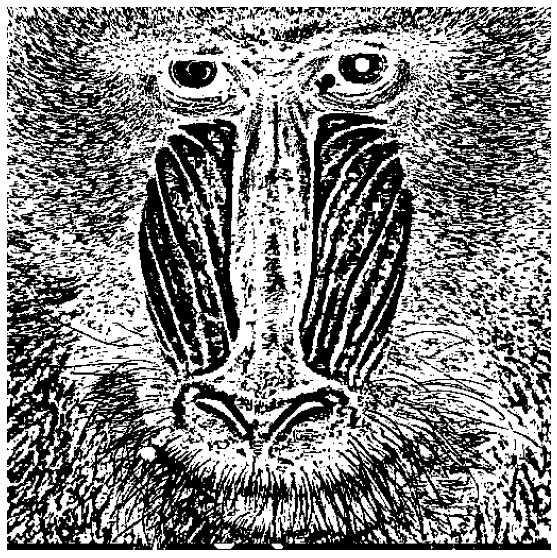

False
True


In [5]:
from mahotas.thresholding import bernsen

mask = bernsen(img, 7, 200)
plot_img(mask)
print(mask.min())
print(mask.max())

# Parte 3 : Método de Niblack

In [8]:
%pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 6.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
Note: you may need to restart the kernel to use updated packages.


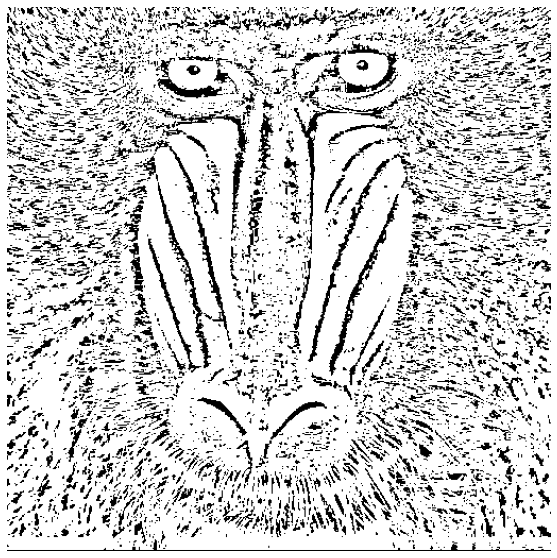

0
1


In [17]:
from skimage.filters import threshold_niblack
window_size = 25
mask = threshold_niblack(img, window_size=window_size, k=0.8)

binary_niblack = (img > mask).astype(np.uint8)
plot_img(binary_niblack)

print(binary_niblack.min())
print(binary_niblack.max())

# Parte 4 : Método de Sauvola e Pietaksinen
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

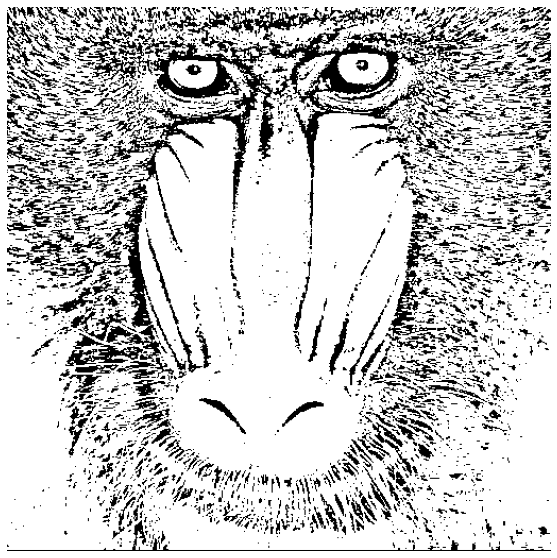

0
1


In [18]:
from skimage.filters import threshold_sauvola
window_size = 25
mask = threshold_sauvola(img, window_size=window_size)

binary_sauvola = (img > mask).astype(np.uint8)
plot_img(binary_sauvola)
print(binary_sauvola.min())
print(binary_sauvola.max())

# Parte 5 : Método de Phansalskar, More e Sabale
TODO : Para os outros métodos, o skimage já tem os filtros de média e contraste
https://craftofcoding.wordpress.com/2021/09/28/thresholding-algorithms-phansalkar-local/
https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py

ERROR: Could not find a version that satisfies the requirement pi2py2 (from versions: none)
ERROR: No matching distribution found for pi2py2
Note: you may need to restart the kernel to use updated packages.


# Parte 7 : Método da média
https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_local

In [ ]:
from skimage.filters import threshold_mean